<div align="right"><em>Машинне навчання. Лабораторний практикум</em></div>

# Лабораторна робота №2
## Візуальний аналіз даних*
    
    
*дані про серцево-судинні захворювання

---

## Завдання

Необхідно дати відповіді (з написанням коду) на запитання щодо набору даних про серцево-судинні захворювання. Дані збережені у файлі *../data/bootcamp5.csv*.

#### Проблема

Прогнозування наявності або відсутності серцево-судинних захворювань (ССЗ), використовуючи результати обстеження пацієнта.

#### Опис даних

Набір даних сформований на основі реальної інформації про серцево-судинні захворювання пацієнтів і містить ознаки, що можна розбити на 3 групи:
- *Об'єктивні*: фактична інформація;
- *Обстеження*: результати медичного огляду;
- *Суб’єктивні*: інформація, надана пацієнтом.

|           Ознака          |    Група    | Назва змінної | Тип значення                                  |
|:------------------------- |:----------- |:------------- |:--------------------------------------------- |
| Вік                       | Об'єктивні  | age           | int (дні)                                     |
| Зріст                      | Об'єктивні  | height        | int (см)                                      |
| Вага                      | Об'єктивні  | weight        | float (кг)                                    | 
| Стать                     | Об'єктивні  | gender        | категоріальний код                            |
| Верхній артеріальний тиск | Обстеження  | ap_hi         | int                                           |
| Нижній артеріальний тиск  | Обстеження  | ap_lo         | int                                           |
| Холестерин                | Обстеження  | cholesterol   | 1: норма, 2: вище норми, 3: значно вище норми |
| Глюкоза                   | Обстеження  | gluc          | 1: норма, 2: вище норми, 3: значно вище норми |
| Куріння                   | Суб’єктивні | smoke         | binary                                        |
| Вживання алкоголю         | Суб’єктивні | alco          | binary                                        |
| Фізична активність        | Суб’єктивні | active        | binary                                        |

Цільова ознака (яку цікаво буде прогнозувати): наявність серцево-судинних захворювань за результатами класичного лікарського огляду (**cardio**).

Всі показники отримані на момент огляду.

## Виконання завдання

In [1]:
# Імпортуємо необхідні модулі
import pandas as pd
import numpy as np

# Графічні модулі
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

ModuleNotFoundError: No module named 'matplotlib'

Будемо використовувати бібліотеку `seaborn` для візуального аналізу, тому давайте зробимо деякі налаштування:

In [3]:
sns.set_context(
    "notebook", 
    font_scale=1.5,       
    rc={ 
        "figure.figsize": (11, 8), 
        "axes.titlesize": 18 
    }
)

from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8

Зчитуємо дані з файлу в память у вигляді об'єкта Pandas.DataFrame

In [4]:
df = pd.read_csv('../data/bootcamp5.csv', sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,1,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,2,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,2,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,1,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,2,156,56.0,100,60,1,1,0,0,0,0


Перетворимо дані у формат *long* та відобразимо кількість значень категоріальних ознак за допомогою [`catplot()`](https://seaborn.pydata.org/generated/seaborn.catplot.html).

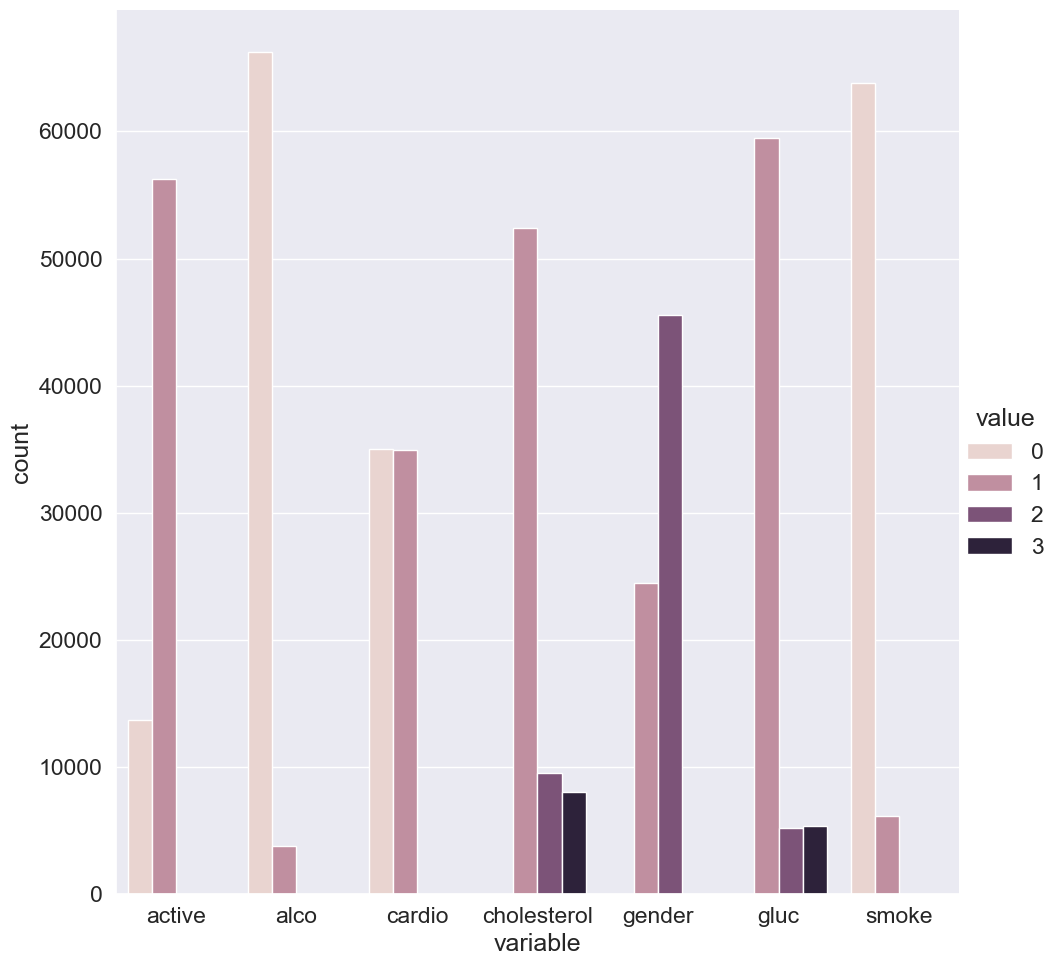

In [5]:
df_uniques = pd.melt(frame=df, value_vars=['gender','cholesterol', 
                                           'gluc', 'smoke', 'alco', 
                                           'active', 'cardio'])
df_uniques = pd.DataFrame(df_uniques.groupby(['variable','value'])['value'].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={'value': 'count'}) \
    .reset_index()

sns.catplot(x='variable', y='count', hue='value', 
               data=df_uniques, kind='bar', height=10);

Бачимо, що цільові класи збалансовані. Чудово!

Розіб'ємо набір даних за значеннями цільової ознаки. Чи можна помітити якусь істотну особливість, просто глянувши на рисунок?

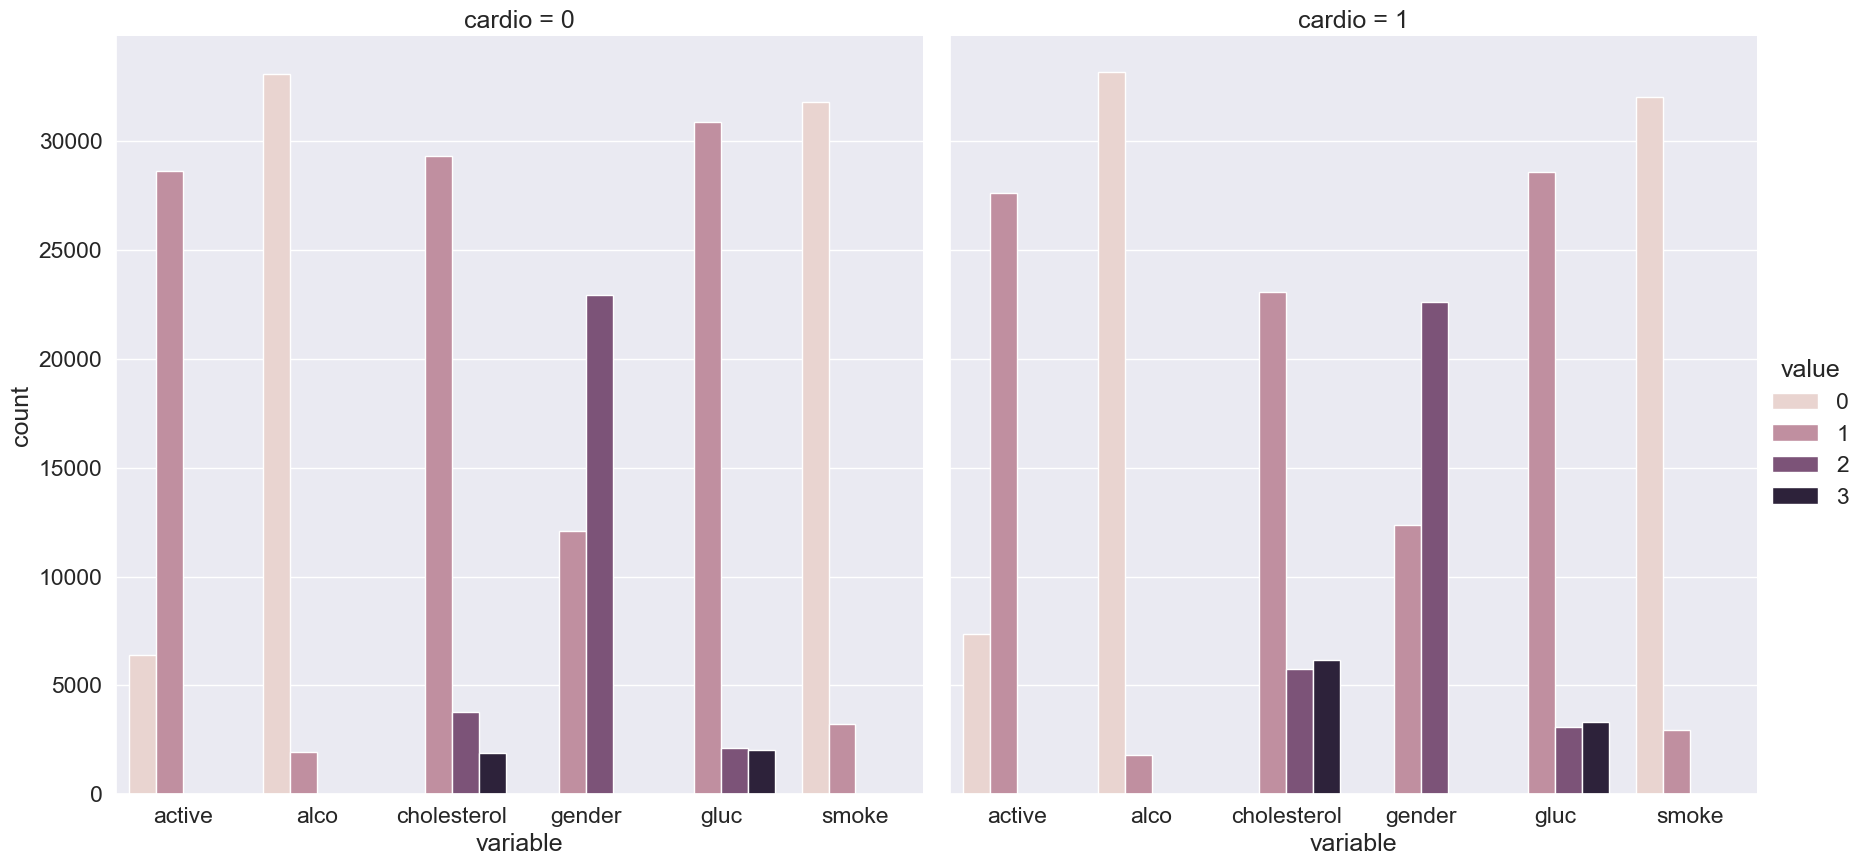

In [6]:
df_uniques = pd.melt(frame=df, value_vars=['gender','cholesterol', 
                                           'gluc', 'smoke', 'alco', 
                                           'active'], 
                     id_vars=['cardio'])
df_uniques = pd.DataFrame(df_uniques.groupby(['variable', 'value', 'cardio'])['value'].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={'value': 'count'}) \
    .reset_index()

sns.catplot(x='variable', y='count', hue='value', 
               col='cardio', data=df_uniques, kind='bar', height=9);

Розподіли рівня холестерину та глюкози для різних значень цільової ознаки сильно відрізняються. Це збіг?

### 1. Візуалізація кореляційної матриці

Щоб краще зрозуміти ознаки, можна створити матрицю коефіцієнтів кореляції між ознаками.

### Завдання:

Побудуйте візуалізацію кореляційної матриці за допомогою [`heatmap()`](http://seaborn.pydata.org/generated/seaborn.heatmap.html). Для створення матриці можете використовувати стандартні інструменти `pandas` з параметрами за замовчуванням.

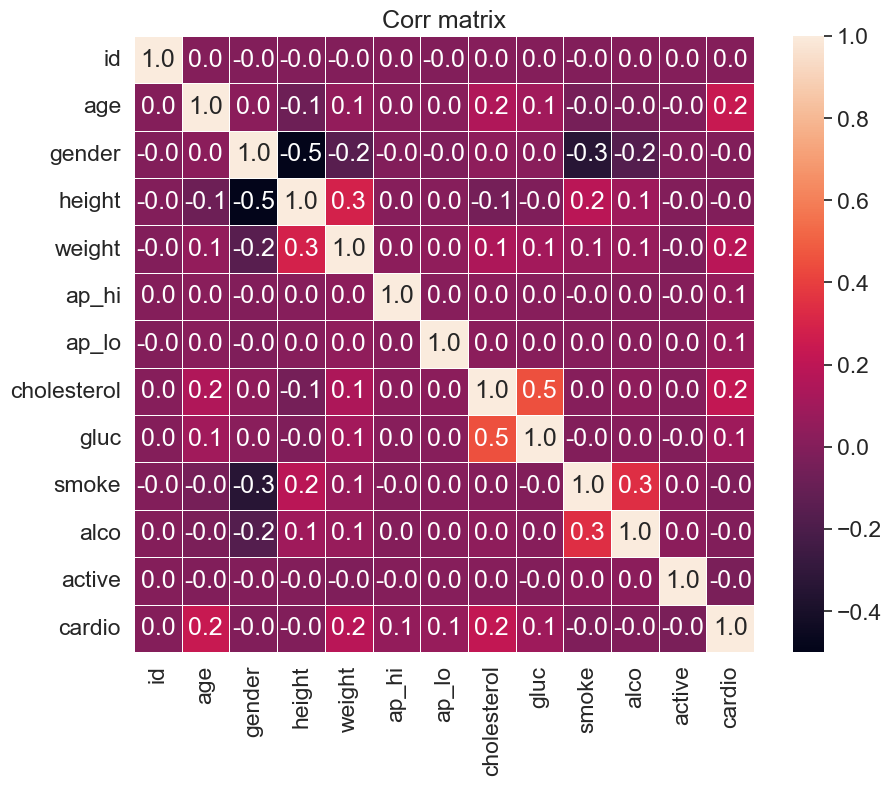

In [7]:
# Ваш код тут
df = pd.read_csv('W:\\University\\Machine Learning\\Lab2\\data\\bootcamp5.csv', sep=';')
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".1f", linewidths=.5)
plt.title("Corr matrix")
plt.show()

# 2

**Запитання 1. Яка пара ознак має найсильнішу кореляцію Пірсона з ознакою "Стать"?**

1. Кардіо, Холестерин
2. Зріст, Куріння
3. Куріння, Вживання алкоголю
4. Зріст, Вага

### 2. Розподіли зросту та ваги чоловіків та жінок

З попереднього аналізу унікальних значень знаємо, що стать кодується значеннями *1* та *2*. Яке з них відповідає жінкам, а яке чоловікам – невідомо. Спробуйте зрозуміти це графічно, дивлячись на середні значення зросту та ваги для кожного значення ознаки "Стать".

*Violin plot* (cкрипковий графік) є комбінацією "ящика з вусами" та я́дрової оцінки щільності розподілу (згладжена гістограма розподілу ознаки) по обидва боки даних. Він може дати нам деталі розподілу, такі як мультимодальність, асиметрія і т.д.

### Завдання:

Створіть *violin plot* для зросту та ваги за допомогою [`violinplot()`](https://seaborn.pydata.org/generated/seaborn.violinplot.html). Використовуйте параметри:
- `hue`, щоб розбити за статтю;
- `scale` для оцінки кількості записів для кожної статі.

Для того, щоб графік відображався правильно, вам потрібно перетворити свій `DataFrame` у формат *long*, використовуючи функцію `melt()` з `pandas`. Ось подібний [приклад](https://stackoverflow.com/a/41575149/3338479) реалізації.

C:\Users\Danik\AppData\Local\Temp\ipykernel_12064\575106316.py:6: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(x="Measurement", y="Value", hue="gender", data=df_melt, scale="count")


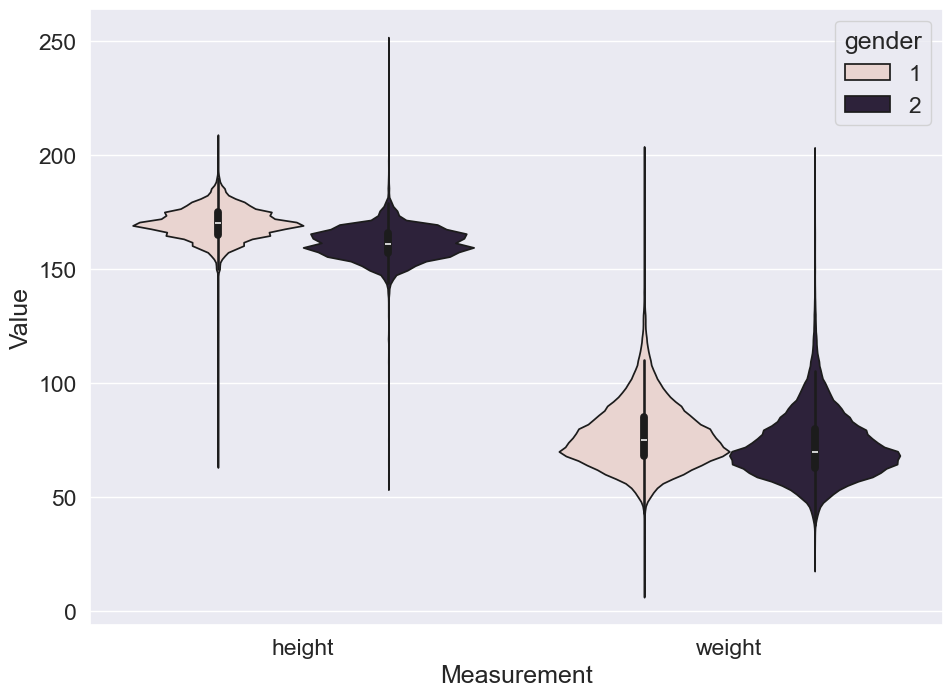

In [8]:
# Ваш код тут
df = pd.read_csv('W:\\University\\Machine Learning\\Lab2\\data\\bootcamp5.csv', sep=';')

df_melt = pd.melt(df, id_vars=['gender'], value_vars=['height', 'weight'], var_name="Measurement", value_name="Value")

sns.violinplot(x="Measurement", y="Value", hue="gender", data=df_melt, scale="count")
plt.show()

# 1 - male 2 - female

## 3. Рангова кореляція

У більшості випадків *коефіцієнта лінійної кореляції Пірсона* більш ніж достатньо для виявлення закономірностей у даних.
Але давайте підемо трохи далі і обчислимо рангову кореляцію.

*Рангова кореляція* – це міра залежності між випадковими величинами (спостережуваними ознаками, змінними), коли цю залежність неможливо визначити кількісно за допомогою звичайного коефіцієнта кореляції. Процедура встановлення рангової кореляції полягає у впорядкуванні досліджуваних об'єктів щодо деякої ознаки, тобто їм приписуються порядкові номери – ранги (по два номери у відповідності до двох ознак між якими досліджується кореляція). Наприклад, найбільше значення для ознаки позначається номером 1, друге за величиною – номером 2 і т.д.

Найбільш поширений *коефіцієнт рангової кореляції Спірмена*, який оцінює наскільки добре можна описати відношення між двома ознаками за допомогою монотонної функції. Як і коефіцієнт кореляції Пірсона він змінюється від -1 до 1. Крайні значення відповідають ідеальному, в даному випадку монотонному, взаємозв'язку між досліджуваними ознаками.
### Завдання:

Обчисліть та побудуйте кореляційну матрицю використовуючи [коефіцієнт рангової кореляції Спірмена](https://uk.wikipedia.org/wiki/%D0%9A%D0%BE%D0%B5%D1%84%D1%96%D1%86%D1%96%D1%94%D0%BD%D1%82_%D0%BA%D0%BE%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D1%96%D1%97_%D1%80%D0%B0%D0%BD%D0%B3%D1%83_%D0%A1%D0%BF%D1%96%D1%80%D0%BC%D0%B5%D0%BD%D0%B0).

Text(0.5, 1.0, 'Spearman corr')

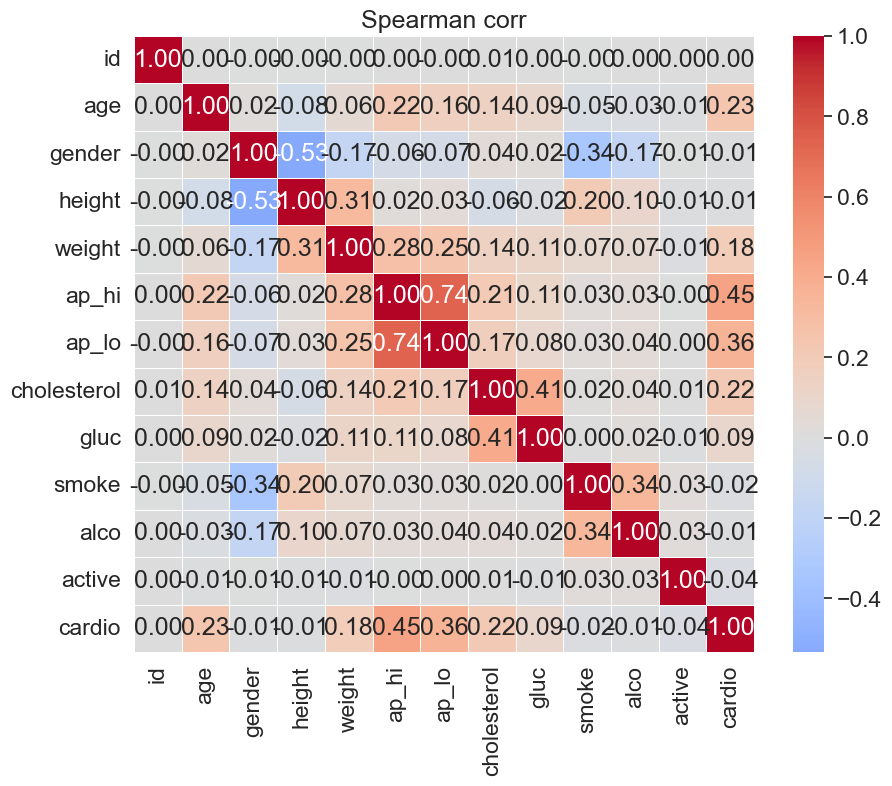

In [9]:
# Ваш код тут
corr_matrix = df.corr(method="spearman")
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5 ,center=0)
plt.title("Spearman corr")

# 5
# 2

**Запитання 2. Яка пара ознак має найсильнішу кореляцію Спірмена?**

1. Зріст, Вага
2. Вік, Вага
3. Холестерин, Глюкоза
4. Кардіо, Холестерин
5. Верхній артеріальний тиск, Нижній артеріальний тиск
6. Куріння, Вживання алкоголю

**Запитання 3. Чому ці ознаки мають сильну рангову кореляцію?**

1. Неточності в даних (помилки в отриманні даних).
2. Зв'язок неправильний, ці ознаки не повинні бути пов’язані між собою.
3. Характер даних.

### 4. Вік

Створіть нову ознаку `age_years` — вік в роках, заокруглений до цілого.

### Завдання:

Побудуйте *count plot*, використовуючи [`countplot()`](http://seaborn.pydata.org/generated/seaborn.countplot.html) з віком (`age_years`) по осі *X* та кількістю людей по осі *Y*. Отриманий графік повинен мати два стовпчики для кожного віку, що відповідають кількостям людей для кожного класу *cardio* цього віку.

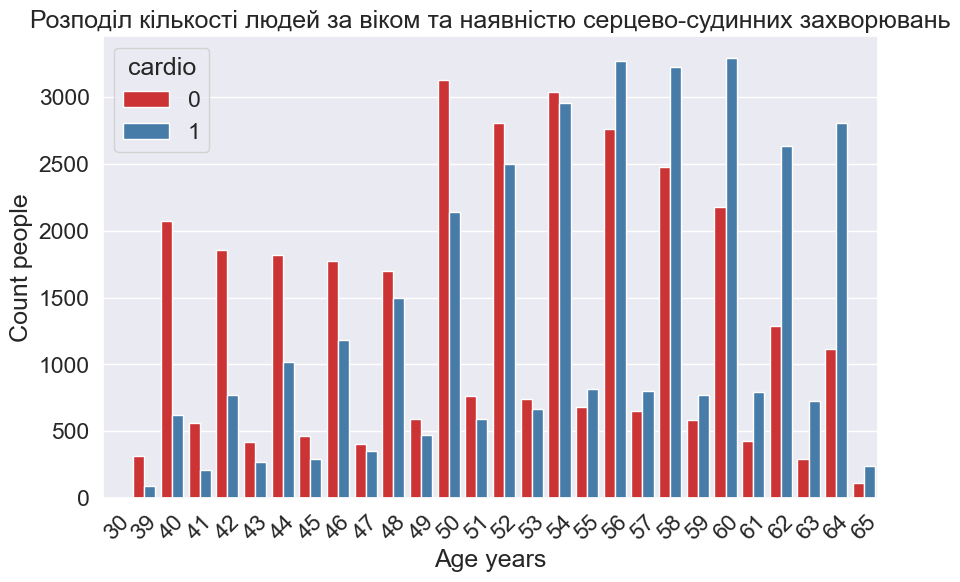

In [10]:
# Ваш код тут
df['age_years'] = (df["age"] / 365).round().astype(int)
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="age_years", hue='cardio', palette="Set1")
plt.title("Розподіл кількості людей за віком та наявністю серцево-судинних захворювань")
plt.xlabel("Age years")
plt.ylabel("Count people")
plt.xticks(rotation = 45)
plt.show()

# 55

**Запитання 4. Який найменший вік, де кількість людей із ССЗ перевищує кількість людей без ССЗ?**

1. 44
2. 55
3. 63
4. 70

### 5. Коробчаста діаграма та викиди

Викиди (англ. outliers) – об'єкти, значення ознак яких сильно відрізняються від ознак основної маси об'єктів. Тобто це об'єкти, які сильно випадають із загальної картини.

Звідки ж беруться викиди? По-перше, поява викидів може бути зумовлена технічною стороною експерименту (наприклад, у процесі збору даних змінилося обладнання або змінилася чутливість датчиків). По-друге, на появу викидів може впливати людський фактор. Можливі й інші причини: зміна правил проведення експерименту, якась випадковість чи справді унікальне значення.

Якою б не була причина появи викидів, вони заважають побудові хороших моделей машинного навчання. Рекомендується виявляти такі аномалії і обробляти їх.

### Завдання:

Побудуйте коробчасту діаграму (*box plot*) для ознаки згідно з варіантом. Проаналізуйте отриману візуазіацію на наявність викидів. Видаліть викиди та побудуйте коробчасту діаграму після видалення.

| Варіант   | Ознака                             |
|-----------|------------------------------------|
|     1     |     Зріст                          |
|     2     |     Вага                           |
|     3     |     Верхній артеріальний тиск      |
|     4     |     Нижній артеріальний тиск       |
|     5     |     Зріст                          |
|     6     |     Вага                           |
|     7     |     Верхній артеріальний тиск      |
|     8     |     Нижній артеріальний тиск       |
|     9     |     Зріст                          | 
|     10    |     Вага                           |
|     11    |     Верхній артеріальний тиск      |
|     12    |     Нижній артеріальний тиск       |

In [23]:
# Ваш код тут
#sns.boxplot(data=df['height'])
Q1 = df["height"].quantile(0.25)
Q3 = df["height"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

df_without_outliers = df[(df['height'] >= lower_bound) & (df["height"] <= upper_bound)]
#sns.boxenplot(data=df_without_outliers['height'])
df.shape[0] - df_without_outliers.shape[0]
# We've deleted 519 rows

519

**Запитання 5. Скільки записів було видалено?**